In [1]:
# -*- coding: utf-8 -*-
# Amitava Chakraborty, 2022
# Extracting  Basic Relationships from Local Text
import nltk
nltk.data.path.append("../nltk-data")

We perform NLTK on a local text file. We will also refer to it as NLTK's corpus file. To access the text file we will use python’s built in open() function. 

In [7]:
rawtextfile = open('script v1.0.txt', 'r')
# We have to read the file so we need to use the read() method immediately after using the open() method as shown in the code 
#rawtextfile.read()
rawtext=rawtextfile.read()

## Cleanup
1. Cleanup \n, \t etc.
2. Tokenization usually have issues with contractions (like can’t, won’t, etc.). To handle such issues we need word replacement. In this case, we can replace contractions with their expanded forms. We perform various kinds of word replacement using regular expressions.
3. Make entire text lowercase

In [9]:
from utils import REReplacer
rep_word = REReplacer()
# Replacement before text processing - One of the common practices while working with NLP is to clean up the text 
# before text processing. In this concern we use REReplacer class as a preliminary step before text processing 
# i.e. tokenization
rawtext = rep_word.replace(rawtext)

#from replacerRE import Rep_word_removal
#rep_word = Rep_word_removal()
#rep_word.replace(rawtext)
rawtext = rawtext.lower()
print(rawtext)

ba : hi, we are here to discuss the requirements around the hotel reservation.  business : welcome ajay, yes, we can start the discussion.  ba : so, what are the broad requirements ? business : we want to start modernization of our hotel reservation.            the customer should be able to use any of the following : telephone based booking, web based booking or in-person booking.      the process should be similar for all : the prospective customers need to check for a property whether any rooms are available or not      for the given request.  ba : what do you mean by "given request"? business : means the type of room, say for example two double bed room with pool view or a suite.  ba : okey. please go ahead. business : if the property has capability of fulfilling that request, then the customer needs to be informed about the rooms rates, other    room services,etc.     ba : if there are no rooms for the given request? business: if there are no rooms available for the given request,

In [10]:
# Now get the tokens
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize.punkt import PunktBaseClass, PunktTrainer, PunktSentenceTokenizer

#Extract sentences and words
pst = PunktSentenceTokenizer(rawtext) #train using our text
sentences = pst.tokenize(rawtext)
words = rawtext.split()

# Use Standard Tokenizer word_tokenize() that is a wrapper on TreebankWordTokenizer
tokenlist = word_tokenize(rawtext)
# Use a better tokenizer - two alternative word tokenizers - PunktWordTokenizer and WordPunctTokenizer.
# We will use WordPunktTokenizer Class
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
betterTokenlist = tokenizer.tokenize(rawtext)

# Even better tokenizer - 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
evenBetterTokenlist = tokenizer.tokenize(rawtext)

print(len(sentences), len(tokenlist), len(betterTokenlist), len(evenBetterTokenlist), len(words))

40 661 668 571 587


In [11]:
print(sentences[5:10])

['the process should be similar for all : the prospective customers need to check for a property whether any rooms are available or not      for the given request.', 'ba : what do you mean by "given request"?', 'business : means the type of room, say for example two double bed room with pool view or a suite.', 'ba : okey.', 'please go ahead.']


In [12]:
from nltk.corpus import stopwords
#print(stopwords.words("english"))
# Remove stop words
english_stops = set(stopwords.words('english'))
words = [w for w in words if w not in english_stops]
print(len(words))

333


In [15]:
# Verify Tokens : we can specify the desired start and end range and then print tokenlist in console.
selectedtokens = tokenlist[0:20]
print (selectedtokens)
selectedtokens = betterTokenlist[0:20]
print (selectedtokens)
selectedtokens = evenBetterTokenlist[0:20]
print (selectedtokens)
tokenlist=evenBetterTokenlist

['ba', ':', 'hi', ',', 'we', 'are', 'here', 'to', 'discuss', 'the', 'requirements', 'around', 'the', 'hotel', 'reservation', '.', 'business', ':', 'welcome', 'ajay']
['ba', ':', 'hi', ',', 'we', 'are', 'here', 'to', 'discuss', 'the', 'requirements', 'around', 'the', 'hotel', 'reservation', '.', 'business', ':', 'welcome', 'ajay']
['ba', 'hi', 'we', 'are', 'here', 'to', 'discuss', 'the', 'requirements', 'around', 'the', 'hotel', 'reservation', 'business', 'welcome', 'ajay', 'yes', 'we', 'can', 'start']


In [16]:
# Now we use NLTK text() method to convert the list of token to type text.
textcontent = nltk.Text(tokenlist)
print(textcontent)

<Text: ba hi we are here to discuss the...>


Displaying 2 of 2 matches:
ba hi we are here to discuss the requirements around the hotel reservation bus
cussion ba so what are the broad requirements business we want to start modern

No common contexts were found


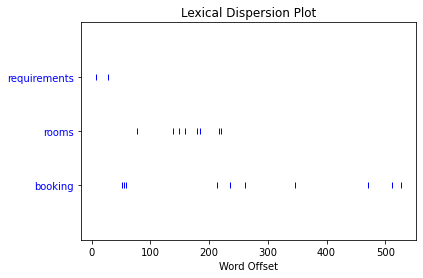

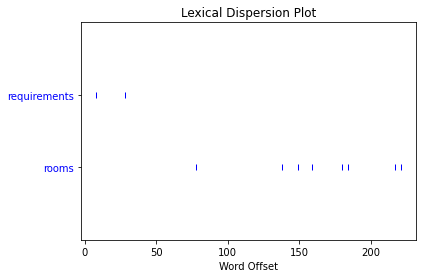

Total Words: 571
Unique words:  217
Lexical Richness:  1.0
Count of word:  11
1.7513134851138354
0.0
Lexical Diversity:  0.38003502626970226
% of age :  0.17513134851138354
properties


198

In [37]:
#%% - Searching Text
#Method1 : Examine the context of a text
#A concordance permits us to see words in context. 
#The first time use of concordance on a particular text - 
#builds an index so that subsequent searches are fast.
textcontent.concordance('requirements')

#%% - Searching Text
#Method 2: access a broader range of text
#What other words appear in a similar range of contexts?
textcontent.similar('discuss')

#Observe that we get different results for different texts. 
#For Austen this word has positive connotations, 
#and sometimes functions as an intensifier like the word very.

#%% - Searching Text
#Method 3: common_contexts 
#allows us to examine just the contexts that are shared by 
#two or more words, such as monstrous and very. 
textcontent.common_contexts(["rooms", "properties"])

#%% - Searching Text
#Method 4: Determine the location of a word in the text
#How many words from the beginning it appears. 
#This positional information can be displayed using a dispersion plot. 
#Each stripe represents an instance of a word, 
#and each row represents the entire text. 
#In the plot we see some striking patterns of word usage over the last 220 years
#You might like to try more words (e.g., liberty, constitution), and different texts. 
textcontent.dispersion_plot(["requirements","rooms", "booking"])
textcontent.dispersion_plot(["requirements","rooms"])

#%% - Vocabulary
#Counting Vocabulary - count the words in a text in a variety of ways. 
#The texts differ in the vocabulary they use. 
#Length of a text
print('Total Words:',len(textcontent))

#So the text has 571 words and punctuation symbols, or "tokens." 
#A token is the technical name for a sequence of characters — such as hairy, his, or :) 
#When we count the number of tokens in a text, say, the phrase to be or not to be, 
#we are counting occurrences of these sequences. 
#Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. 
#But there are only four distinct vocabulary items in this phrase. 
#So, how many distinct words does this text contain? 
#The vocabulary of a text is just the set of tokens that it uses,
#since in a set, all duplicates are collapsed together. 
sortedtextContent=sorted(set(textcontent))
print('Unique words: ',len(set(sortedtextContent)))
unique_item_types=len(set(sortedtextContent))

#So, although the text has 571 tokens, it has only 217 distinct words
#we will generally call these unique items types instead of word types.

#Lexical richness of a text: 
#each word is used 16 times on average
print('Lexical Richness: ',float(len(set(sortedtextContent)))/len(sortedtextContent))

#On particular words
#Count how often a word occurs in a text, 
#Then compute what percentage of the text is taken up by a specific word
print('Count of word: ',textcontent.count("room"))
print(100 * float(textcontent.count('booking'))/len(textcontent))
print(100 * float(textcontent.count('requirement'))/len(textcontent))

#%% - 
#We want to repeat such calculations on several texts
#So we will have our own function 'lexical_diversity'
#so that we can re-use it
def lexical_diversity(text):
    return float(len(set(text)))/len(text)
def percentage(count, total):
    return 100 * count/total

lookupWord='age'
print('Lexical Diversity: ',lexical_diversity(textcontent))
print('% of '+lookupWord+" : ",percentage(float(textcontent.count(lookupWord)),len(textcontent)))


#%% - Indexing Lists
#A text in Python is a list of words
#represented using a combination of brackets and quotes
#We can pick out the 1st, 173rd, or even 14,278th word in a printed text. 
#The number that represents this position is the item's index. 
#show us the item that occurs at an index 173 in a text
print(textcontent[173])
#Or the converse; given a word, find the index of when it first occurs:
textcontent.index(lookupWord)

In [38]:
# Stemming: In our text we may find many words like playing, played, playfully, etc… which have a root word, 
# play all of these convey the same meaning. 
# So we can just extract the root word and remove the rest. 
# Here the root word formed is called ‘stem’ and it is not necessarily that stem needs to exist and have a meaning. 
#Just by committing the suffix and prefix, we generate the stems.

#NLTK provides us with PorterStemmer LancasterStemmer and SnowballStemmer packages.
from nltk.stem.porter import PorterStemmer
# Reduce words to their stems
#stemmed = [PorterStemmer().stem(w) for w in words]
from nltk.stem.lancaster import LancasterStemmer
#stemmed = [LancasterStemmer().stem(w) for w in words]
from nltk.stem.snowball import SnowballStemmer
stemmed = [SnowballStemmer('english').stem(w) for w in words]
print(stemmed)

['ba', ':', 'hi,', 'discuss', 'requir', 'around', 'hotel', 'reservation.', 'busi', ':', 'welcom', 'ajay,', 'yes,', 'start', 'discussion.', 'ba', ':', 'so,', 'broad', 'requir', '?', 'busi', ':', 'want', 'start', 'modern', 'hotel', 'reservation.', 'custom', 'abl', 'use', 'follow', ':', 'telephon', 'base', 'booking,', 'web', 'base', 'book', 'in-person', 'booking.', 'process', 'similar', ':', 'prospect', 'custom', 'need', 'check', 'properti', 'whether', 'room', 'avail', 'given', 'request.', 'ba', ':', 'mean', '"given', 'request"?', 'busi', ':', 'mean', 'type', 'room,', 'say', 'exampl', 'two', 'doubl', 'bed', 'room', 'pool', 'view', 'suite.', 'ba', ':', 'okey.', 'pleas', 'go', 'ahead.', 'busi', ':', 'properti', 'capabl', 'fulfil', 'request,', 'custom', 'need', 'inform', 'room', 'rates,', 'room', 'services,etc.', 'ba', ':', 'room', 'given', 'request?', 'business:', 'room', 'avail', 'given', 'request,', 'guest', 'inform', 'properti', 'vicin', 'check', 'room', 'there.', 'room', 'rate', 'decid'

In [39]:
# Lemmatization: We want to extract the base form of the word here. 
# The word extracted here is called Lemma and it is available in the dictionary. 
# We have the WordNet corpus and the lemma generated will be available in this corpus. 
# NLTK provides us with the WordNet Lemmatizer that makes use of the WordNet Database to lookup lemmas of words.
from nltk.stem.wordnet import WordNetLemmatizer
# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)
# Note : Stemming is much faster than lemmatization as 
# it doesn’t need to lookup in the dictionary and just follows the algorithm to generate the root words.

['ba', ':', 'hi,', 'discus', 'requirement', 'around', 'hotel', 'reservation.', 'business', ':', 'welcome', 'ajay,', 'yes,', 'start', 'discussion.', 'ba', ':', 'so,', 'broad', 'requirement', '?', 'business', ':', 'want', 'start', 'modernization', 'hotel', 'reservation.', 'customer', 'able', 'use', 'following', ':', 'telephone', 'based', 'booking,', 'web', 'based', 'booking', 'in-person', 'booking.', 'process', 'similar', ':', 'prospective', 'customer', 'need', 'check', 'property', 'whether', 'room', 'available', 'given', 'request.', 'ba', ':', 'mean', '"given', 'request"?', 'business', ':', 'mean', 'type', 'room,', 'say', 'example', 'two', 'double', 'bed', 'room', 'pool', 'view', 'suite.', 'ba', ':', 'okey.', 'please', 'go', 'ahead.', 'business', ':', 'property', 'capability', 'fulfilling', 'request,', 'customer', 'need', 'informed', 'room', 'rates,', 'room', 'services,etc.', 'ba', ':', 'room', 'given', 'request?', 'business:', 'room', 'available', 'given', 'request,', 'guest', 'informe

In [ ]:
# Parse tree or Syntax Tree generation : We can define grammar and 
# then use NLTK RegexpParser to extract all parts of speech from the sentence and draw functions to visualize it.

# Import required libraries
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [40]:
# Step 1 : Tag Tokens - Find all parts of speech in above sentence
tagged = nltk.pos_tag(tokenlist)
print(tagged[0:20])

[('ba', 'NN'), ('hi', 'NN'), ('we', 'PRP'), ('are', 'VBP'), ('here', 'RB'), ('to', 'TO'), ('discuss', 'VB'), ('the', 'DT'), ('requirements', 'NNS'), ('around', 'IN'), ('the', 'DT'), ('hotel', 'NN'), ('reservation', 'NN'), ('business', 'NN'), ('welcome', 'JJ'), ('ajay', 'JJ'), ('yes', 'IN'), ('we', 'PRP'), ('can', 'MD'), ('start', 'VB')]


In [41]:
def backoff_tagger(train_sentences, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sentences, backoff=backoff)
    return backoff

from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger
from nltk.tag import DefaultTagger
from nltk.corpus import treebank
train_sentences = treebank.tagged_sents()[:2500]
tagged_sentences = []
for sent in sentences:
    tagged_sentences.append(nltk.pos_tag(nltk.word_tokenize(sent)))
print(len(tagged_sentences), tagged_sentences)
train_sentences = tagged_sentences[0:14]
back_tagger = DefaultTagger('NN')
#Uni_tagger = UnigramTagger(train_sentences, backoff = back_tagger)
#Uni_tagger.evaluate(tagged_sentences)
Combine_tagger = backoff_tagger(train_sentences, [UnigramTagger, BigramTagger, TrigramTagger], backoff = back_tagger)
test_sentences = tagged_sentences[15:]
Combine_tagger.evaluate(test_sentences)

40 [[('ba', 'NN'), (':', ':'), ('hi', 'NN'), (',', ','), ('we', 'PRP'), ('are', 'VBP'), ('here', 'RB'), ('to', 'TO'), ('discuss', 'VB'), ('the', 'DT'), ('requirements', 'NNS'), ('around', 'IN'), ('the', 'DT'), ('hotel', 'NN'), ('reservation', 'NN'), ('.', '.')], [('business', 'NN'), (':', ':'), ('welcome', 'JJ'), ('ajay', 'NN'), (',', ','), ('yes', 'UH'), (',', ','), ('we', 'PRP'), ('can', 'MD'), ('start', 'VB'), ('the', 'DT'), ('discussion', 'NN'), ('.', '.')], [('ba', 'NN'), (':', ':'), ('so', 'RB'), (',', ','), ('what', 'WP'), ('are', 'VBP'), ('the', 'DT'), ('broad', 'JJ'), ('requirements', 'NNS'), ('?', '.')], [('business', 'NN'), (':', ':'), ('we', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('start', 'VB'), ('modernization', 'NN'), ('of', 'IN'), ('our', 'PRP$'), ('hotel', 'NN'), ('reservation', 'NN'), ('.', '.')], [('the', 'DT'), ('customer', 'NN'), ('should', 'MD'), ('be', 'VB'), ('able', 'JJ'), ('to', 'TO'), ('use', 'VB'), ('any', 'DT'), ('of', 'IN'), ('the', 'DT'), ('following', 'J

0.6608910891089109

In [33]:
sentence1 = tagged_sentences[5]
print(sentence1)
grammar = "NP:{<DT>?<JJ>*<NN>}" 
Reg_parser = nltk.RegexpParser(grammar)
output = Reg_parser.parse(sentence1)
output.draw()

[('etcba', 'NN'), (':', ':'), ('you', 'PRP'), ('talked', 'VBD'), ('about', 'IN'), ('room', 'NN'), ('amenities', 'NNS'), ('?', '.')]


In [ ]:
grammar = "NP:{<DT><NN.*><.*>*<NN.*>}}<VB.*>{"
chunker = nltk.RegexpParser(grammar)#r'''NP:{<DT><NN.*><.*>*<NN.*>}}<VB.*>{''')
output = chunker.parse(sentence1)
output.draw()

In [ ]:
# Step 2: Identify named entities
entities = nltk.chunk.ne_chunk(tagged)
print (entities)
entities.draw()

In [54]:
output = nltk.chunk.ne_chunk(sentence1)
print (output)
output.draw()

(S
  etcba/NN
  :/:
  you/PRP
  talked/VBD
  about/IN
  room/NN
  amenities/NNS
  ?/.)


In [48]:
from nltk.parse.stanford import StanfordDependencyParser
path_jar = 'E:/DevelopmentEnvironments/stanford-nlp/stanford-parser-4.2.0.zip'
path_models_jar = 'E:/DevelopmentEnvironments/stanford-nlp/stanford-corenlp-4.2.0-models-english.jar'
dep_parser = StanfordDependencyParser(
   path_to_jar = path_jar, path_to_models_jar = path_models_jar
)
result = dep_parser.raw_parse(sentences[14])
print(sentences[14])
depndency = next(result)
list(depndency.triples())

<ipython-input-48-515c50a0cdde>:4: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  dep_parser = StanfordDependencyParser(


can we talk a bit more on that?business : okey.


[(('talk', 'VB'), 'aux', ('can', 'MD')),
 (('talk', 'VB'), 'nsubj', ('we', 'PRP')),
 (('talk', 'VB'), 'obj', ('more', 'JJR')),
 (('more', 'JJR'), 'dep', ('bit', 'NN')),
 (('bit', 'NN'), 'det', ('a', 'DT')),
 (('talk', 'VB'), 'obl', ('that?business', 'NNS')),
 (('that?business', 'NNS'), 'case', ('on', 'IN')),
 (('talk', 'VB'), 'advmod', ('okey', 'RB'))]

In [56]:
# Relation extraction - process of extracting the different relationships between various entities. 
# There can be different relationships like inheritance, synonyms, analogous, etc., 
# whose definition depends on the information need. 
# For example, suppose if we want to look for write of a book then the authorship would be a relation 
# between the author name and book name.

# In the following example, we use the same IE pipeline, 
# as shown in the above diagram, that we used till Named-entity relation (NER) and 
# extend it with a relation pattern based on the NER tags.

import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus = 'ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


In [53]:
# Filter words meeting some criteria: In the code below, words with length greater than 3 character is filtered
filtered_tokens = [words for words in set(words) if len(words) > 3]

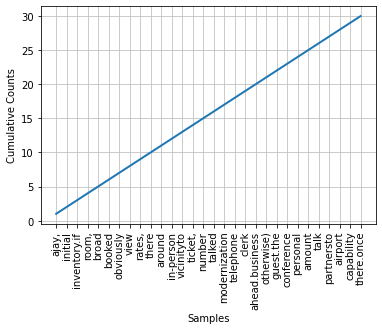

In [54]:
from nltk.probability import FreqDist
#
# Frequency distribution
#
fdist = FreqDist(filtered_tokens)
#
# Plot the frequency distribution of 30 words with
# cumulative = True
#
fdist.plot(30, cumulative=True)

In [55]:
# Create Bar Plot for frequently occurring words
# This is useful in visualising the top words (stresses on which objects are most) used in the text. 
# One of the areas where it can be very helpful is to come up with the objective of the text. 
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Print words having 5 or more characters which occured for 5 or more times
frequent_words = [[fdist[word], word] for word in set(filtered_tokens) if len(word) > 3 and fdist[word] >= 1]
print (frequent_words)

[[1, 'ajay,'], [1, 'initial'], [1, 'inventory.if'], [1, 'room,'], [1, 'broad'], [1, 'booked'], [1, 'obviously'], [1, 'view'], [1, 'rates,'], [1, 'there'], [1, 'in-person'], [1, 'number'], [1, 'around'], [1, 'ticket,'], [1, 'vicinityto'], [1, 'talked'], [1, 'modernization'], [1, 'telephone'], [1, 'clerk'], [1, 'ahead.business'], [1, 'otherwise)'], [1, 'guest.the'], [1, 'conference'], [1, 'personal'], [1, 'amount'], [1, 'talk'], [1, 'partnersto'], [1, 'airport'], [1, 'capability'], [1, 'there.once'], [1, 'additional'], [1, 'want'], [1, 'customer'], [1, 'amenities'], [1, 'provide?business'], [1, 'etcba'], [1, 'removed'], [1, 'hotel.'], [1, 'partners,'], [1, 'used'], [1, 'merchants.'], [1, 'prospective'], [1, 'coupons'], [1, 'yes,'], [1, 'special'], [1, 'that?business'], [1, 'whether'], [1, 'in-room'], [1, 'means'], [1, 'they'], [1, 'avail'], [1, 'properties'], [1, 'here'], [1, 'obviously.'], [1, 'class'], [1, 'about'], [1, 'free'], [1, 'service'], [1, 'informed'], [1, 'anything'], [1, 'ma

Text(0, 0.5, 'Words Frequency')

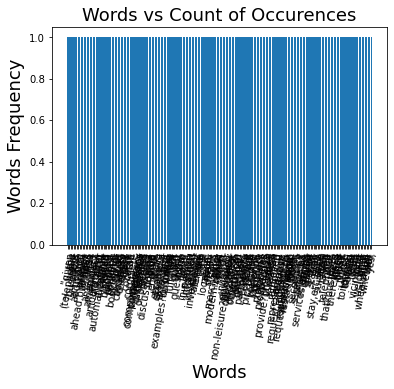

In [56]:
# Record the frequency count of
sorted_word_frequencies = {}
for item in sorted(frequent_words):
    sorted_word_frequencies[item[1]] = item[0]

# Create the plot
plt.bar(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.values()), align='center')
plt.xticks(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.keys()), rotation=80)
plt.title("Words vs Count of Occurences", fontsize=18)
plt.xlabel("Words", fontsize=18)
plt.ylabel("Words Frequency", fontsize=18)